In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


ad = pd.read_csv('Advertising.csv')
df = ad.copy()
df.head()

X = df[['TV']]
X[0:5]
X = sm.add_constant(X)
y = df['sales']

lm = sm.OLS(y,X)
model = lm.fit()

import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV', df)
model = lm.fit()

X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X, y)

In [7]:
lm = smf.ols('sales ~ TV', df)
model = lm.fit()

In [8]:
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [12]:
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [13]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [14]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [16]:
k_t = pd.DataFrame({'gercek_y': y[0:10],
                   'tahmin_y': reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [17]:
k_t['hata'] = k_t['gercek_y'] - k_t['tahmin_y']
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [18]:
k_t['hata_kare'] = k_t['hata']**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [21]:
np.sum(k_t['hata_kare'])

92.90350329638105

In [22]:
np.mean(k_t['hata_kare'])

9.290350329638105

In [23]:
np.sqrt(np.mean(k_t['hata_kare']))

3.048007599996776

In [34]:
lm = sm.OLS(y,X)
model = lm.fit()

In [37]:
model.resid[0:10]

0    2.944265
1    6.695392
2    7.868107
3    5.887684
4   -2.151529
5    6.475728
6    7.013147
7    3.193397
8    4.084053
9   -6.033272
dtype: float64

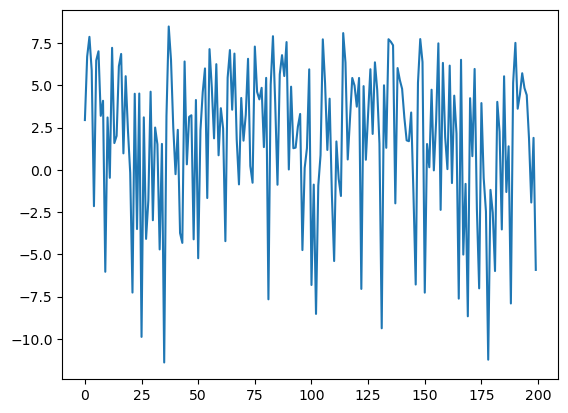

In [39]:
plt.plot(model.resid);